### 作業

目標: 建立一深度學習模型預測客戶是否流失

- 問題1: 利用df 產生 X,y
- 問題2: 請將資料區分為訓練與測試資料集
- 問題3: 請將資料標準化
- 問題4: 使用Keras 建立深度學習模型預測客戶是否流失
- 問題5: 評估模型準確度

In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv', header = 0 )
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# df.iloc[ row , column ]
df = df.iloc[ : , 3 : ]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.select_dtypes('object').head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [7]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
geo = pandas.get_dummies(df['Geography'])
del geo['France']
geo.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [13]:
gender = pandas.get_dummies(df['Gender'])
del gender['Female']
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [15]:
df['Gender'].replace({'Male':1, 'Female':0})

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [16]:
geo.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [19]:
df2 = pandas.concat([geo, gender, df], axis = 1)

In [20]:
df2.head()

,Germany,Spain,Male,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
# del df2['Gender']
#　df2 = df2.drop(['Geography', 'Gender'], axis = 1)
df2.drop(['Geography', 'Gender'], axis = 1, inplace=True)

In [23]:
df2.head()

,Germany,Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,850,43,2,125510.82,1,1,1,79084.10,0


In [24]:
#　今天我想點蛋炒飯
# 今天我想吃雞蛋糕
#　今天　我　想　點　蛋炒飯　吃　雞蛋糕
#  1  1 1  1  1   0  0
#  1  1 1  0  0   1  1

### 答案一

In [25]:
y = df2.iloc[:, -1]
X = df2.iloc[:, :-1]

In [26]:
X.head()

,Germany,Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,0,0,619,42,2,0.00,1,1,1,101348.88
1,0,1,0,608,41,1,83807.86,1,0,1,112542.58
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57
3,0,0,0,699,39,1,0.00,2,0,0,93826.63
4,0,1,0,850,43,2,125510.82,1,1,1,79084.10


In [27]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### 答案二

In [28]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [29]:
train_X.shape

(7000, 11)

In [30]:
test_X.shape

(3000, 11)

In [31]:
train_y.shape

(7000,)

In [32]:
test_y.shape

(3000,)

### 答案三

In [36]:
import numpy as np
def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

sigmoid_function(train_X['Balance'])

9069    1.0
2603    1.0
7738    0.5
1579    1.0
5058    1.0
       ... 
5734    1.0
5191    0.5
5390    0.5
860     1.0
7270    1.0
Name: Balance, Length: 7000, dtype: float64

In [37]:
train_X['Balance']

9069    175406.13
2603    160426.07
7738         0.00
1579     37702.79
5058    148466.93
          ...    
5734     69712.74
5191         0.00
5390         0.00
860     190227.46
7270    147910.30
Name: Balance, Length: 7000, dtype: float64

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)

In [39]:
sc.mean_

array([2.48857143e-01, 2.50285714e-01, 5.46714286e-01, 6.52158857e+02,
       3.88997143e+01, 4.98671429e+00, 7.63979744e+04, 1.52428571e+00,
       7.05571429e-01, 5.14857143e-01, 1.00825753e+05])

In [40]:
sc.var_

array([1.86927265e-01, 1.87642776e-01, 2.47817776e-01, 9.25936591e+03,
       1.10372800e+02, 8.31568063e+00, 3.90824984e+09, 3.36838776e-01,
       2.07740388e-01, 2.49779265e-01, 3.32418347e+09])

In [42]:
train_X[0:3,:]

array([[-0.57559072,  1.73073215, -1.09823226, -0.34459497, -0.65674999,
        -0.34217046,  1.58372514,  0.81966266,  0.64598061,  0.97071435,
         1.24821373],
       [ 1.73734559, -0.57779016, -1.09823226, -0.09518109, -0.46637979,
         0.69816249,  1.34410551, -0.90335195, -1.54803408,  0.97071435,
         1.52122527],
       [-0.57559072, -0.57779016,  0.91055421, -0.94734518, -0.56156489,
         0.35138484, -1.22205481,  0.81966266, -1.54803408, -1.03016917,
         1.2636148 ]])

In [43]:
test_X = sc.transform(test_X)

In [44]:
test_X[0:3,:]

array([[ 1.73734559, -0.57779016,  0.91055421, -0.5836166 , -0.65674999,
        -0.68894811,  0.32489437,  0.81966266, -1.54803408, -1.03016917,
        -1.02396381],
       [-0.57559072, -0.57779016,  0.91055421, -0.30302599,  0.39028611,
        -1.38250341, -1.22205481,  0.81966266,  0.64598061,  0.97071435,
         0.79009571],
       [-0.57559072,  1.73073215, -1.09823226, -0.53165538,  0.48547121,
        -0.34217046, -1.22205481,  0.81966266,  0.64598061, -1.03016917,
        -0.73304841]])

### 答案四

In [87]:
# 11 -> 5 -> 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(5, activation = 'relu', input_shape = (11,)))
model.add(Dense(1, activation = 'sigmoid'))

In [88]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 5)                 60        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.compile(optimizer='adam',
       loss='binary_crossentropy',
       metrics=['accuracy'])

In [ ]:
history = model.fit(train_X, train_y,
    batch_size = 128,
    epochs = 100,
    verbose = 1,
    validation_data = (test_X, test_y))

### 答案五

In [55]:
model.evaluate(test_X,test_y)

94/94 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8693


[0.33374014496803284, 0.8693333268165588]

In [60]:
pred_y = (model.predict(test_X) > 0.5).astype(int).flatten()
pred_y

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y)

0.8693333333333333

### callback

In [91]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_filepath = '/content/checkpoint_repo'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model.fit(train_X, train_y,
    batch_size = 128,
    epochs = 100,
    verbose = 1,
    callbacks = model_checkpoint_callback,
    validation_data = (test_X, test_y))

## Overfitting

In [ ]:
# 11 -> 5 -> 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(256, activation = 'relu', input_shape = (11,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
       loss='binary_crossentropy',
       metrics=['accuracy'])

history = model.fit(train_X, train_y,
    batch_size = 128,
    epochs = 100,
    verbose = 1,
    validation_data = (test_X, test_y))

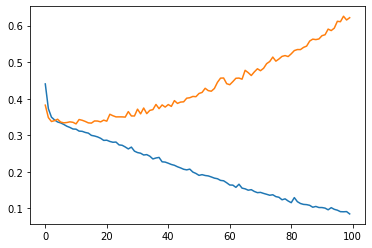

In [94]:
from matplotlib import pyplot as plt

plt.plot(list(range(len(history.history.get('loss')))), history.history.get('loss'))
plt.plot(list(range(len(history.history.get('loss')))), history.history.get('val_loss'))

## K-Fold Cross Validation

In [95]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [96]:
df = df.iloc[:,3:]
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

In [97]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.33, random_state =42)

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)

In [99]:
test_x = sc.transform(test_x)

In [100]:
def buildClassifier(optimizer):
  model = Sequential()                                 
  model.add(Dense(8, activation='relu', input_dim = 16))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [101]:
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

classifier = KerasClassifier(build_fn = buildClassifier, 
               batch_size = 30, 
               epochs   = 100, 
               verbose   = 0, 
               optimizer  = 'adam')

accuracies = cross_val_score(estimator = classifier, X = train_x, y = train_y, cv = 5)

In [104]:
accuracies

array([0.9194631 , 0.9194631 , 0.92841166, 0.88565022, 0.94170403])

In [105]:
accuracies.mean()

0.918938422203064

In [106]:
accuracies.std()

0.01852927705013313

## Dropout

In [107]:
from tensorflow.keras.layers import Dropout
def buildClassifierWithDropout(optimizer):
  model = Sequential()                                 
  model.add(Dense(8, activation='relu', input_dim = 16))
  model.add(Dropout(rate = 0.1))
  model.add(Dense(8, activation='relu'))
  model.add(Dropout(rate = 0.1))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [108]:
m = buildClassifierWithDropout('adam')
m.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 9         
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [109]:
classifier = KerasClassifier(build_fn = buildClassifierWithDropout, 
               batch_size = 30, 
               epochs   = 100, 
               verbose   = 0, 
               optimizer  = 'adam')

accuracies2 = cross_val_score(estimator = classifier, X = train_x, y = train_y, cv = 5)

In [110]:
accuracies2

array([0.89485461, 0.89038032, 0.94854587, 0.89461881, 0.9103139 ])

In [112]:
accuracies.mean(), accuracies2.mean()

(0.918938422203064, 0.907742702960968)

In [113]:
accuracies.std(), accuracies2.std()

(0.01852927705013313, 0.02150024030554373)

## Regularization

In [114]:
from tensorflow.keras import regularizers
def buildClassifierWithRegularizer(optimizer):
  model = Sequential()                                                        
  model.add(Dense(8, activation='relu', input_dim = 16))
  model.add(Dense(8, activation='relu',activity_regularizer=regularizers.l2(0.01)))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [115]:
classifier = KerasClassifier(build_fn = buildClassifierWithRegularizer, 
               batch_size = 30, 
               epochs   = 100, 
               verbose   = 0, 
               optimizer  = 'adam')

accuracies3 = cross_val_score(estimator = classifier, X = train_x, y = train_y, cv = 5)

In [116]:
accuracies.mean(), accuracies2.mean(), accuracies3.mean()

(0.918938422203064, 0.907742702960968, 0.9162498354911804)

In [117]:
accuracies.std(), accuracies2.std(), accuracies3.std()

(0.01852927705013313, 0.02150024030554373, 0.019153788590022102)

## GridSearch

In [118]:
from sklearn.model_selection import GridSearchCV

classifier = KerasClassifier(
    build_fn = buildClassifier, 
    epochs = 10,
    verbose = 0)

parameters = {'batch_size': [100, 200],
        'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = classifier,
               param_grid = parameters,
               scoring = 'accuracy',
               cv = 2)

grid_search     = grid_search.fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [119]:
best_parameters = grid_search.best_params_
best_parameters

{'batch_size': 200, 'optimizer': 'rmsprop'}

In [120]:
best_accuracy   = grid_search.best_score_
best_accuracy

0.8571434301428237